# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
html_content = browser.html
page_soup = soup(html_content, 'html.parser')


In [5]:
# Extract all rows of data
# Find the table using its class
data_table = page_soup.find('table', class_='table')

# Extract all rows from the table
table_rows = data_table.find_all('tr')
data_rows = table_rows[1:]

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [6]:
# Create an empty list
column_names = ['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']
data_list = []

# Loop through the scraped data to create a list of rows
for row in data_rows:
    cells = row.find_all('td')
    data_list.append([cell.text for cell in cells])

In [7]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
mars_df = pd.DataFrame(data_list, columns=column_names)

In [8]:
# Confirm DataFrame was created successfully
mars_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [9]:
# Examine the data type of each column
data_types = mars_df.dtypes

print(data_types)

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object


In [11]:
# Change data types for data analysis
# Convert 'sol' column to integer data type
mars_df['sol'] = mars_df['sol'].astype(int)

# Convert 'min_temp' column to float data type
mars_df['min_temp'] = mars_df['min_temp'].astype(float)

# Examine the updated data types
updated_data_types = mars_df.dtypes
updated_data_types

id                   object
terrestrial_date     object
sol                   int32
ls                   object
month                object
min_temp            float64
pressure             object
dtype: object

In [12]:
# Confirm type changes were successful by examining data types again
# Convert 'terrestrial_date' column to datetime data type
mars_df['terrestrial_date'] = pd.to_datetime(mars_df['terrestrial_date'])

# Examine the updated data types
updated_data_types = mars_df.dtypes
print(updated_data_types)

id                          object
terrestrial_date    datetime64[ns]
sol                          int32
ls                          object
month                       object
min_temp                   float64
pressure                    object
dtype: object


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [13]:
# 1. How many months are there on Mars?
month_counts = mars_df['month'].astype(int).value_counts().sort_index()
print("Expedition duration by month:")
print(month_counts)

Expedition duration by month:
month
1     174
2     178
3     192
4     194
5     149
6     147
7     142
8     141
9     134
10    112
11    138
12    166
Name: count, dtype: int64


In [14]:
# 2. How many Martian days' worth of data are there?
total_days = mars_df['sol'].max() - mars_df['sol'].min()

print("Total Martian days' worth of data:", total_days)

Total Martian days' worth of data: 1967


In [15]:
# Convert the "month" column to integers and the "min_temp" column to float
mars_df['month'] = mars_df['month'].astype(int)
mars_df['min_temp'] = mars_df['min_temp'].astype(float)

# Group the data by month and calculate the average low temperature for each month
average_temp_by_month = mars_df.groupby('month')['min_temp'].mean()

# Sort the results in ascending order
average_temp_by_month_sorted = average_temp_by_month.sort_index()

print("Average low temperature by month (ascending order):")
print(average_temp_by_month_sorted)

Average low temperature by month (ascending order):
month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64


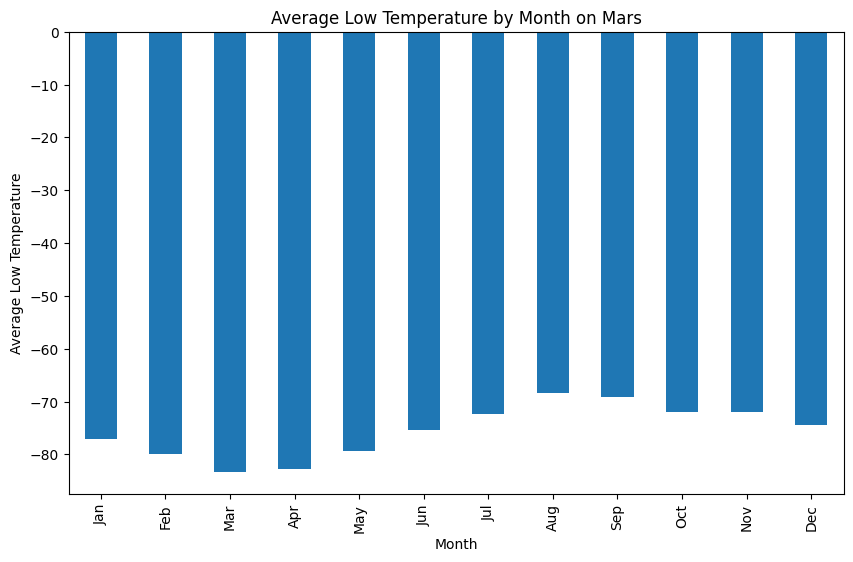

In [16]:

# Group the data by month and calculate the average low temperature for each month
average_temp_by_month = mars_df.groupby('month')['min_temp'].mean()

# Sort the results in ascending order
average_temp_by_month_sorted = average_temp_by_month.sort_index()

# Define month names for the x-axis labels
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Plot the data
plt.figure(figsize=(10, 6))
average_temp_by_month_sorted.plot(kind='bar')
plt.xticks(range(12), month_names)  # Set the x-axis ticks and labels
plt.xlabel('Month')
plt.ylabel('Average Low Temperature')
plt.title('Average Low Temperature by Month on Mars')
plt.show()

In [17]:
# Identify the coldest and hottest months in Curiosity's location

# Group the data by month and calculate the average low temperature for each month
average_temp_by_month = mars_df.groupby('month')['min_temp'].mean()

# Find the coldest and hottest months
coldest_month = average_temp_by_month.idxmin()
hottest_month = average_temp_by_month.idxmax()

print("Coldest month:", coldest_month)
print("Hottest month:", hottest_month)

Coldest month: 3
Hottest month: 8


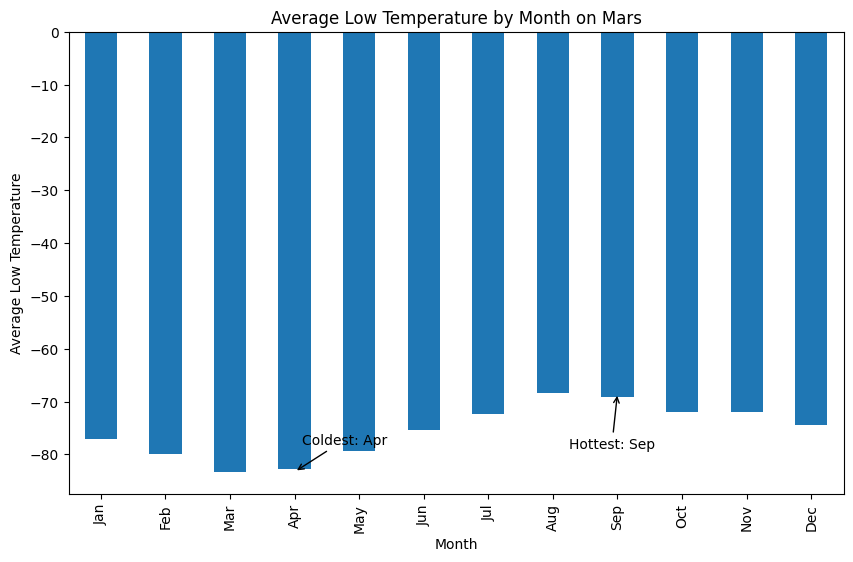

In [18]:

# Group the data by month and calculate the average low temperature for each month
average_temp_by_month = mars_df.groupby('month')['min_temp'].mean()

# Find the coldest and hottest months
coldest_month = average_temp_by_month.idxmin()
hottest_month = average_temp_by_month.idxmax()

# Sort the results in ascending order
average_temp_by_month_sorted = average_temp_by_month.sort_index()

# Define month names for the x-axis labels
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Plot the data
plt.figure(figsize=(10, 6))
average_temp_by_month_sorted.plot(kind='bar')
plt.xticks(range(12), month_names)  # Set the x-axis ticks and labels
plt.xlabel('Month')
plt.ylabel('Average Low Temperature')
plt.title('Average Low Temperature by Month on Mars')
plt.annotate(f'Coldest: {month_names[coldest_month]}', xy=(coldest_month, average_temp_by_month_sorted[coldest_month]), xytext=(5, 20),
             textcoords='offset points', arrowprops=dict(arrowstyle="->"))
plt.annotate(f'Hottest: {month_names[hottest_month]}', xy=(hottest_month, average_temp_by_month_sorted[hottest_month]), xytext=(-35, -40),
             textcoords='offset points', arrowprops=dict(arrowstyle="->"))
plt.show()

In [25]:
# 4. Average pressure by Martian month

# Group the data by month and calculate the average atmospheric pressure for each month
average_pressure_by_month = mars_df.groupby('month')['pressure'].mean()

# Sort the results in ascending order
average_pressure_by_month_sorted = average_pressure_by_month.sort_index()

print(average_pressure_by_month_sorted)

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64


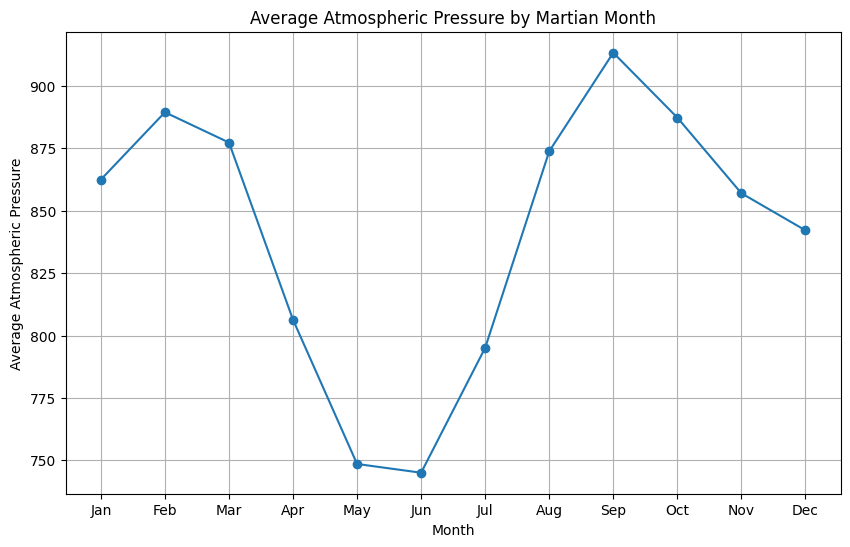

In [26]:
# Plot the average pressure by month
# Group the data by month and calculate the average atmospheric pressure for each month
average_pressure_by_month = mars_df.groupby('month')['pressure'].mean()

# Sort the results in ascending order
average_pressure_by_month_sorted = average_pressure_by_month.sort_index()

# Define month names for the x-axis labels
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(month_names, average_pressure_by_month_sorted, marker='o')
plt.xlabel('Month')
plt.ylabel('Average Atmospheric Pressure')
plt.title('Average Atmospheric Pressure by Martian Month')
plt.grid(True)
plt.show()

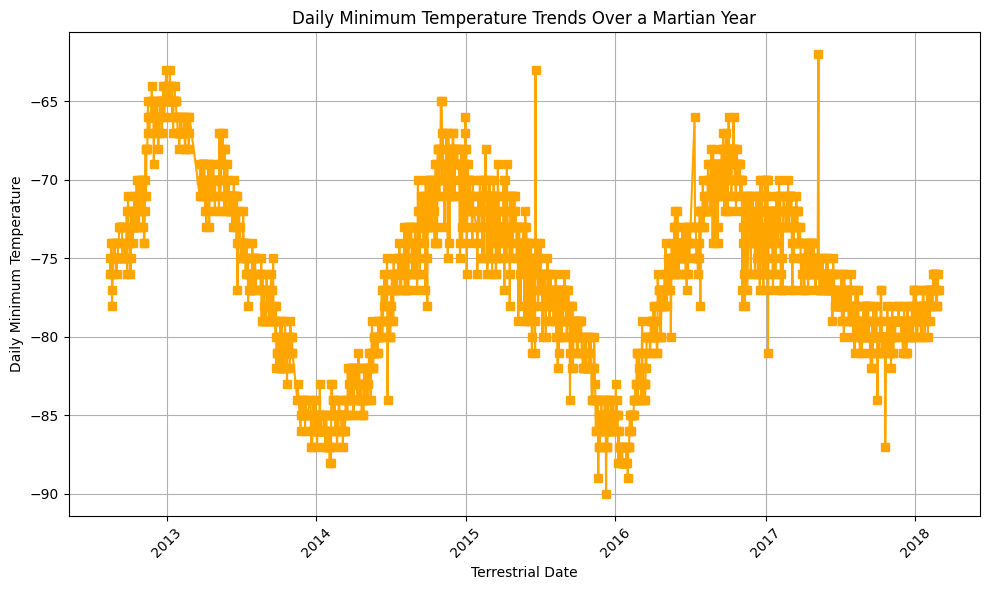

Estimated Earth days in a Martian year: 634.6506679861454


In [41]:
# 5. How many terrestrial (earth) days are there in a Martian year?

# Convert the "terrestrial_date" column to datetime if needed
mars_df['terrestrial_date'] = pd.to_datetime(mars_df['terrestrial_date'])

# Calculate the number of Earth days in a Martian year
earth_days_in_martian_year = 687

# Plot the daily minimum temperature data against time
plt.figure(figsize=(10, 6))
plt.plot(mars_df['terrestrial_date'], mars_df['min_temp'], marker='s', linestyle='-', color='orange')
plt.xlabel('Terrestrial Date')
plt.ylabel('Daily Minimum Temperature')
plt.title('Daily Minimum Temperature Trends Over a Martian Year')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

# Estimate the number of Earth days in a Martian year based on the plot
estimated_earth_days = len(mars_df['terrestrial_date']) / (mars_df['terrestrial_date'].max() - mars_df['terrestrial_date'].min()).days * earth_days_in_martian_year

print("Estimated Earth days in a Martian year:", estimated_earth_days)


On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [42]:
# Write the data to a CSV
mars_df.to_csv('mars_data.csv', index=False)

In [43]:
browser.quit()